# ASL Project

In [1]:
#Import libraries
import numpy as np
import random

# Imports to view data
import cv2
import pandas as pd
from glob import glob

# Visualization
from keras.utils import print_summary
from matplotlib import pyplot as plt

#ML libraries
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint  
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
#Directory paths
TRAIN_DIR = "../Dataset/asl_alphabet_train/asl_alphabet_train"
TEST_DIR = "../Dataset/asl_alphabet_test"
MODEL_DIR = './Model'
MODEL_PATH = MODEL_DIR+"/Model1-resnet.h5"
MODEL_WEIGHT_PATH = MODEL_DIR+"/Model_Weight1-resnet.h5"

In [3]:
# Set global variables
TARGET_SIZE = (64, 64)
TARGET_DIMS = (64, 64, 3) # add channel for RGB
CLASSES = 29
VALIDATION_SPLIT = 0.1
BATCH_SIZE = 64

## Data Augmentation

In [4]:
#Load Train dataset
train_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=VALIDATION_SPLIT
)

validation_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=VALIDATION_SPLIT
)

train_generator = train_image_generator.flow_from_directory(TRAIN_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, shuffle=True, subset="training")
val_generator = validation_image_generator.flow_from_directory(TRAIN_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


## Model

In [7]:
#Define Model Xception Model
def ResNet_model_build():
    from keras.applications.resnet50 import ResNet50
    from keras.layers import Input

    input_tensor = Input(shape=TARGET_DIMS)
    model = ResNet50(input_tensor = input_tensor, weights=None, include_top=True, classes= CLASSES)
    return model

In [8]:
from keras.models import Model
base_model = ResNet_model_build()
x = base_model.output
#x = (Dense(CLASSES, activation='softmax'))(x)
model = Model(inputs=base_model.input, outputs=x)

#Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()
model.save(MODEL_PATH)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [11]:
#Checkpointer to save the best models
checkpointer = ModelCheckpoint(filepath=MODEL_WEIGHT_PATH, 
                               verbose=1, save_best_only=True)

steps_per_epoch = int( np.ceil(len(train_generator)*2 / BATCH_SIZE) )
validation_steps = int( np.ceil(len(val_generator)*2 / BATCH_SIZE) )

history = model.fit_generator(train_generator, validation_data=val_generator, 
                    steps_per_epoch =  steps_per_epoch,
                    validation_steps = validation_steps,
                    epochs=50, callbacks=[checkpointer], verbose=1)

Epoch 1/50
39/39 [==============================] - 288s 7s/step - loss: 3.8955 - acc: 0.0321 - val_loss: 9.8428 - val_acc: 0.0375

Epoch 00001: val_loss improved from inf to 9.84282, saving model to ./Model/Model_Weight1-resnet.h5
Epoch 2/50
39/39 [==============================] - 292s 7s/step - loss: 3.8134 - acc: 0.0505 - val_loss: 11.5285 - val_acc: 0.0250

Epoch 00002: val_loss did not improve from 9.84282
Epoch 3/50
39/39 [==============================] - 292s 7s/step - loss: 4.1149 - acc: 0.0465 - val_loss: 3.4157 - val_acc: 0.0469

Epoch 00003: val_loss improved from 9.84282 to 3.41573, saving model to ./Model/Model_Weight1-resnet.h5
Epoch 4/50
39/39 [==============================] - 292s 7s/step - loss: 4.1329 - acc: 0.0509 - val_loss: 13.5252 - val_acc: 0.0563

Epoch 00004: val_loss did not improve from 3.41573
Epoch 5/50
39/39 [==============================] - 291s 7s/step - loss: 3.8097 - acc: 0.0529 - val_loss: 4.6915 - val_acc: 0.0531

Epoch 00005: val_loss did not im

39/39 [==============================] - 295s 8s/step - loss: 2.1112 - acc: 0.4523 - val_loss: 5.2334 - val_acc: 0.1812

Epoch 00044: val_loss did not improve from 1.49920
Epoch 45/50
39/39 [==============================] - 292s 7s/step - loss: 2.0283 - acc: 0.4371 - val_loss: 2.1304 - val_acc: 0.4688

Epoch 00045: val_loss did not improve from 1.49920
Epoch 46/50
39/39 [==============================] - 293s 8s/step - loss: 1.6838 - acc: 0.5152 - val_loss: 3.5611 - val_acc: 0.2531

Epoch 00046: val_loss did not improve from 1.49920
Epoch 47/50
39/39 [==============================] - 293s 8s/step - loss: 1.6520 - acc: 0.5357 - val_loss: 7.5688 - val_acc: 0.1750

Epoch 00047: val_loss did not improve from 1.49920
Epoch 48/50
39/39 [==============================] - 292s 7s/step - loss: 1.5839 - acc: 0.5545 - val_loss: 9.1777 - val_acc: 0.1531

Epoch 00048: val_loss did not improve from 1.49920
Epoch 49/50
39/39 [==============================] - 293s 8s/step - loss: 1.5855 - acc: 0.54

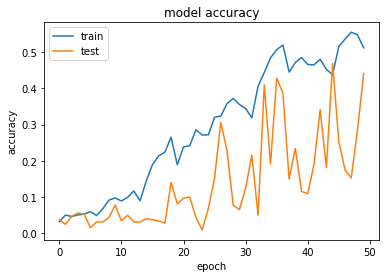

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

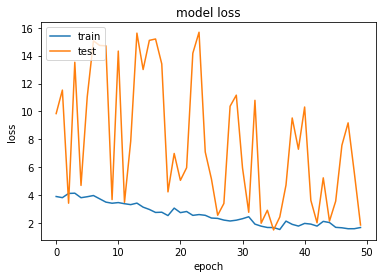

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#Predict on validation dataset
predictions = model.predict_generator(val_generator, steps=1)        
predictions = np.argmax(predictions, axis=-1) #multiple categories
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v

predictions = [label_map[k] for k in predictions]

print(predictions, len(predictions))

loss, acc = model.evaluate_generator(val_generator, steps=1, verbose=0)

print(loss,",",acc)

['W', 'K', 'B', 'C', 'W', 'U', 'C', 'F', 'del', 'G', 'M', 'W', 'A', 'del', 'Z', 'N', 'L', 'L', 'F', 'X', 'space', 'J', 'W', 'K', 'F', 'U', 'C', 'A', 'U', 'W', 'W', 'K', 'D', 'U', 'A', 'W', 'space', 'U', 'F', 'M', 'D', 'nothing', 'Q', 'A', 'U', 'W', 'del', 'C', 'B', 'Q', 'W', 'W', 'D', 'N', 'U', 'Y', 'Y', 'D', 'G', 'A', 'del', 'L', 'S', 'E'] 64
1.7840827703475952 , 0.4375


In [13]:
test_image_generator = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,
)

test_generator = test_image_generator.flow_from_directory(TEST_DIR, target_size=TARGET_SIZE, batch_size=28, shuffle=False, 
    class_mode='categorical')
print(test_generator.classes)

Found 28 images belonging to 1 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
#Predict
test_generator.reset()
predictions = model.predict_generator(test_generator, steps=1)
predictions = np.argmax(predictions, axis=1) #multiple categories
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v

predictions = [label_map[k] for k in predictions]

print(predictions, len(predictions))

['S', 'B', 'C', 'D', 'E', 'F', 'G', 'del', 'I', 'L', 'K', 'L', 'M', 'N', 'O', 'Q', 'Q', 'R', 'S', 'T', 'U', 'W', 'W', 'U', 'F', 'Z', 'nothing', 'space'] 28


In [15]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(results)

                              Filename Predictions
0         asl_alphabet_test\A_test.jpg           S
1         asl_alphabet_test\B_test.jpg           B
2         asl_alphabet_test\C_test.jpg           C
3         asl_alphabet_test\D_test.jpg           D
4         asl_alphabet_test\E_test.jpg           E
5         asl_alphabet_test\F_test.jpg           F
6         asl_alphabet_test\G_test.jpg           G
7         asl_alphabet_test\H_test.jpg         del
8         asl_alphabet_test\I_test.jpg           I
9         asl_alphabet_test\J_test.jpg           L
10        asl_alphabet_test\K_test.jpg           K
11        asl_alphabet_test\L_test.jpg           L
12        asl_alphabet_test\M_test.jpg           M
13        asl_alphabet_test\N_test.jpg           N
14        asl_alphabet_test\O_test.jpg           O
15        asl_alphabet_test\P_test.jpg           Q
16        asl_alphabet_test\Q_test.jpg           Q
17        asl_alphabet_test\R_test.jpg           R
18        asl_alphabet_test\S_t

In [16]:
count = 0
for file,prediction in zip(filenames,predictions):
    #print(file,prediction)
    if(prediction+'_test' in file):
        count+=1
        
print("accuracy",count/len(filenames)*100)

accuracy 75.0
